# Project 1: Linear Quadratic Regulator (LQR) Design
>**Date Created**: 26 January 2024<br>
>**Course**: AEM566 - Optimal Estimation<br>
>**Author**: Benjamin Lucke<br>

In [21]:
import control as ct
import numpy as np
import pandas as pd
import scipy as sp
import sympy as smp


from matplotlib import pyplot as plt 


# Problem Description
___

### Dynamical System

In many instances for spacecraft dynamics and control, one is interested in modeling the dynamics
between multiple spacecraft, e.g., a **rendezvous and proximity operation (RPO)**. To that end,
consider the following simplified model of two satellites operating in proximity, i.e. a simplified
**three-body problem**, involving a **chaser spacecraft** and a **target spacecraft** (subscript $t$) on
an elliptical orbit. One can represent this relative motion in the **Hill frame (HF)** for the target
spacecraft as shown in the following figure.

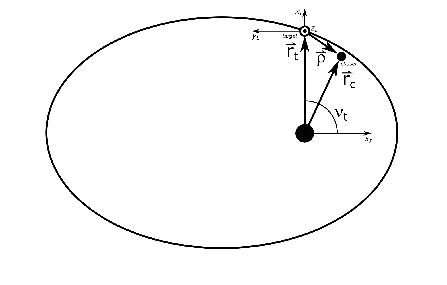

Thus, one can represent the target position relative to the celestial body in the target’s HF axes
as $$\vec{r}_t = \begin{bmatrix} r_t \\ 0 \\ 0 \end{bmatrix}$$

and the relative position of the chaser in the target's HF axes as $$\vec{\rho} = \begin{bmatrix} x \\ y \\ z\end{bmatrix}$$

Then, noting $$\vec{r}_c = \vec{r}_t + \vec{\rho}$$ 

## Problem 1

Compute the eigenvalues of the state matrix for the continuous LTI system and comment on the stability of the system.
#### Solution

Define constants

In [32]:
mu = 3.986004418*10**14 ## m^3s^-2
rt = 6783000 # meters
x0 = np.array([1000, 1000, 1000, 0, 0, 0]) # m
nt = np.sqrt(mu/(rt**3))

nt_symbolic = smp.Symbol('n_t')

In [64]:
A_ct_sympy = smp.Matrix([[0,0,0,1,0,0],
                [0,0,0,0,1,0],
                [0,0,0,0,0,1],
                [3*nt_symbolic**2, 0,0,0, 2*nt_symbolic, 0],
                [0,0,0, -2*nt_symbolic**2, 0,0],
                [0, 0, -nt_symbolic**2, 0, 0, 0]])
A_ct_numpy = np.array([[0,0,0,1,0,0],
                [0,0,0,0,1,0],
                [0,0,0,0,0,1],
                [3*nt**2, 0,0,0, 2*nt, 0],
                [0,0,0, -2*nt**2, 0,0],
                [0, 0, -nt**2, 0, 0, 0]])
eigs_A_symbolic = A_ct_sympy.subs(nt_symbolic, .01).eigenvals().keys()
vals, vecs = np.linalg.eig(A_ct_numpy)
print(eigs_A_symbolic)

dict_keys([0, -0.0172046505340853, 0.0172046505340853, -0.01*I, 0.01*I])


$r_t$ will never be less than zero, and $\mu$ is a constant greter than zero, so $n_t$ will always be greater than zero. For $n_t \geq 0$, the eigenvalues of the dynamics matrix are purely imaginary and thus the system is **marginally stable**, that is, the system will have bounded oscillations with no control input. 

### Problem 2
Compute the controllability matrix for the continuous-time LTI system.

In [70]:
B_ct_sympy = smp.Matrix([[0,0,0],
                        [0,0,0],
                        [0,0,0],
                        [1,0,0],
                        [0,1,0],
                        [0,0,1]])

B_ct_numpy = np.array([[0,0,0],
                        [0,0,0],
                        [0,0,0],
                        [1,0,0],
                        [0,1,0],
                        [0,0,1]])

ctrb = ct.ctrb(A_ct_numpy, B_ct_numpy)
print(np.linalg.matrix_rank(ctrb))

6


System is controllable since the controllability matrix is full rank.

### Problem 3

Design a finite-horizon LQR for the continuous time system with $t_f = 16200 s$.

In [248]:
def dPdt(t, P, A, B, Q, R):
    P = P.reshape((6,6))
    dpdt = (-np.dot(P,A) - np.dot(A.T, P) + np.dot(P, B).dot(np.linalg.inv(R)).dot(B.T).dot(P) - Q).flatten()
    
    return dpdt
    
sol = sp.integrate.solve_ivp(dPdt, t_span=[16200, 0], y0=np.zeros((6,6)).flatten(), args=(A_ct_numpy, B_ct_numpy, np.eye(6),np.eye(3)))

t = np.flip(sol.t)
P = np.flip(sol.y.reshape((6,6,-1)))


In [435]:
def dPdt(t, P, A, B, Q, R):
    P = P.reshape((6,6))
    dpdt = (-np.dot(P,A) - np.dot(A.T, P) + np.dot(P, B).dot(np.linalg.inv(R)).dot(B.T).dot(P) - Q).flatten()
    
    return dpdt

ts=np.linspace(16200, 0, 33000)
af = sp.integrate.odeint(dPdt, y0=np.zeros((6,6)).flatten(),  t=ts, args=(A_ct_numpy, B_ct_numpy, np.eye(6),np.eye(3)),tfirst=True)
Paf = af.reshape((6,6,-1))

ts = np.flip(ts)
Paf = np.flip(Paf)

In [436]:
def dxdt(t, x, A, B, R, P, ts):
    idx +=1 
    print(idx)
#     P_t = P[:,:,np.where((ts == t))[0][0]]
#     K_t = np.linalg.inv(R).dot(B.T).dot(P_t)
    
    xdot = x
    return xdot.flatten()
    